# Data Augmentation
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks. This is where the **Data Augmentation** technique comes in, which, as its name indicates, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
*  Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

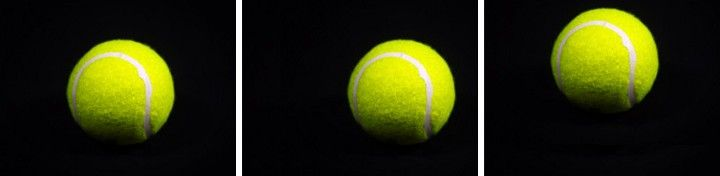



The same ball with some translations



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal. There are many ways to augment data with images, such as:

1.   Turn around (Flip)
2.  Rotation

1.    Scale
2.   Trim
1.   Transfer
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model. This is accomplished by using the ImageDataGenerator class. A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Flipping the image using the arguments **horizontal_flip** and **vertical_flip**.
*   Image rotations through the argument **rotation_range**
*   • Image brightness using the argument **brightness_range**.
*   • Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


**image_dataset**_from_directory function

**label_mode:** - 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss). - 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss). - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).

**class_names:** Only valid if "labels" is "inferred". This is the explict list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).

**shuffle**: Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.

**interpolation**: String, the interpolation method used when resizing images. Defaults to bilinear. Supports bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.




**ImageDataGenerator**.flow_from_dataframe(
    dataframe,

Code: color_mode="rgb",

•	**color_mode**: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

•	**color_mode**: One of "grayscale", "rgb", "rgba". Default: "rgb". The desired image format.

•	**grayscale**: DEPRECATED use color_mode="grayscale".


In [2]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                 #Library that allows working with arrangement
from numpy import expand_dims       #Expand the array shape
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array # will take a picture (PIL) and convert it to an array. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #class that takes original data, transforms it randomly and returns only the new transformed data
from PIL import Image #Python image library
from urllib.request import urlopen #Let’s read an email address


First, we upload an image from the internet


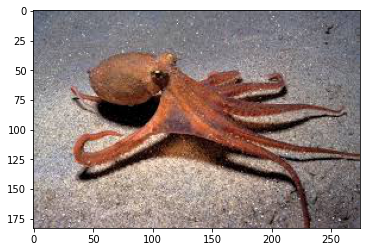

In [3]:
url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFRUXGRoZGBgYGBsgGhobGxgdGhofHxobIiggGh0lHxcfITEiJSkrLy4uHx8zODMwNygtLisBCgoKDg0OGxAQGy0mICUtLS01LS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAECAwUGBwj/xAA7EAABAwMCAwUHBAICAQQDAAABAhEhAAMxEkEEUWEFInGBkQYTMqGxwfBC0eHxI1IHFBUkYnKiFjOS/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAKBEAAgIBAwQCAgIDAAAAAAAAAAECEQMSITEEE0FRImEyQnGBM1KR/9oADAMBAAIRAxEAPwDJSeRIJ9NsipWEOWOImY8qtQnVjHKrgiGYTMGQ30EY8K3ZmVhGOQmatTZJgDfbJPKkYEEdfSlbB2L5I8PCosqh1pB8Y/tvz92X8/55Gq13O8x+Qhh6b1baW3TG2N4O1ADJhn/PKrBv8/SlcZ90s5bP5tTWlANEbjnQAku4UYl+r04Q3hNTtpEEsz4c85lqutpdTtpBaXJH0f60DKDadiZH701xIJJZuQyw2kZq8JBImPoCGeklCYOouc93HhMx4UWKgRQHPwH5ikE9M1euQ4Y7+H71EpHMtz+9NvYKKlOW9PvtTJBxh6kXO/jzqy6t1bmAHJcwJLxEQNgwlnMDK7aHIHgA8DkZ286SJDVam4AkgzDJbn16VQS+Nt/yaYEXOwMU4JcvBcQRtzL/AJNTuKJMGP6/anUC46h8z+RQBVoEMnH47c/Com2C0VcSdIHmRs/4KbSBPyf96YFS7YGwZxtv/dII5ATiPL+Kmrodxz9fGpG27nLy+TnpQBAKKSFBnBHg+1Su2lJLQ5EhiCmTBcBmzESKsWiGYM2eXLzinsoHwqUzy4D4BbE5hpz0oApBz9wKYDaOUMRyn1q0I/ZvV6ibLS3p1/umIFuI3bfOPHaKrWwy+dstuOZoovJU/wDX5jrUVLGeu5n8xSGDqDHBkQG++1QVaeXZvnyq27ch3cknUOjiZYbn0ON6LHGoWTpLpDOoDd8Dmd2flRYUNc3Inp4Yim8g58I86tQCcw89fD5eNSuDHh57fKqEVBTQyfNKX+dKoFadi9KlsBppQ0hx6Z3Y/Ok7GRy8/wANWBGzeM+lQRaYFmZ3A+p+dDYJCSYyT8qnpPq3L1jwplOrEc888v8AmKvKoIdknI2JA5bSSz4epGUBJPm/5OatuWgAkgguJgAgw/rt9qYGM48Ki4weu4FOwodKGg1IJG58jv6CpW7g2H3/AD+aSS7ftii0FF9wZAMdRPoPo9UhJG28/epLUGgx86cLb4jDsQCHblggelSMgQTDxjLORj65pEkAgvPpBM9acdTIguJ3ieT0xQ25/fbpzpWOiSiTMDcgOwYCZ5+POq1PgeVTuKGR+edRS/1oERTbZ38TttTqSCwAzkZeY+dTuy/PrvzqpKikgjIZoDZ3eGoAjjy33qxTMNIaGPedy8mBGYB9agi3OWfPL8ilOIfNMBFG8sX/AK+YpBJ23aPnjwq1CdSgARsJwPGosCJETz+hpgPcTGC7YGfw1Vd4UgjBPqA/1iitaSBDaWDbNL+B9d6l70HYcw/kT9qLH5BU8MotH8sKkeDMF23g9N/zNW6i3xRyxHgPtyp0FwVd10y2xZhGQf7otgD+6LwXnHOamkFIKiSSGfHIgZ3nNKHDxlp64EzkVK6l3cCcuDPnL+tMkhaWnJwNQfkXPkQ8nzpJTqdQYgM5bryM/nlSt8OAIEhmaGYvn5N5091ADMGZuedxHjnwpDILuBzpBaHHMcieQP0eh02xkgO7ifrsRD0ULKi5AL+GG8PyKrvJYOoNu5gPzbxoAA7QskpKUr0FoLAtExiar4HhtKEpJCtIyzDlgnq9GcclTd0IJDfE7dWKej0wtlsCfo3LlQIZKSJVzy/pVV2Q3MNjmYpaGBJY52fMeu/SpggBlCY35R57UxGeq8p/hV5FNKixaBkqU/QJpUtx7GloJI6Z/Ovz61YkdPAH543qaUSXEDM5aOUeE/NqYpBjcfOcD89NwCvUHxvMn7x/NTSHITAGHUWTHXap2mBCu73WLEOCXdsYb6Go3A+B9en3HzpDKks4BhO5An6/erBbE95jz2Mhndm3nwipKDBp8g3j+daZNvk3nTpgVpMnI071YQMDo/MECaRUkOTFBXLqlZeYYdW5bxWc5qPJpDG5cBFzikjJfoJ8enTO9R/7g06U25c958gswI8nprFkY3Gx8WNEJtJ8RyfpXNLqHZ1Lpl5B/eLMt5b551FXErfvJcgMGJO5O5cTNFIQYZm5b/OrbfDPH48/xUPNP2aLp4PlAVviwAUrCgSI5CfCdx/TEpKFTs7h5xnG/OrzwxGUkts8E55buzg0yeNDqBAaYy204fFD6mWnbka6SOr6B+IsFATcIQCdgQ/Mak7Ajk9InmnMgvDMDILnlWZ29xald0A69nBIiQCx1ZejuG4YJAzgCef/AMcD0rfBKcl8jlzwjF7FgQCIORI5THyPzqaQGLku0ENl9+cP51abBLbH0fyD0lWY1MwHUZyYG3l9DXQc9AygYaZ6ftON6n7sxL5MeO/p+PRIsRJLtjny86QsgYYn8bzoAGQl/HkfSrUpYzkDeCG+dEe6id/P8nkaexwwMhixAgHDzPSd9+lAAig8MJLv6/jVJSTCSk/aQ79YHo1FKI0sphiRlz8J3lnH9mmjUW7wEQwJIf8AUS3SkMGKObiQSG9CRtl6joDyWAP1c/IB6IIAbSWLu74cAGQ37+lVgEgbttHpMdW2osKBxwwLs5Gl5JPLkwl8HnTBIBwY8unmdm6Vfbtk90MQn/XA3dh0nlVdtpUS74nKR4RADUgZBSmkEiGd+u7zs/4amC+G6/J/tUlWn70M4DTDyCX5gc/lUb7OxIxLGJTjGQ/y86qxAy07u79B9932qspbls0x4ADwqarZ5O2GfLHZpFVKTLQCdtuvz5Yp2Khlpdw4DAk564aR+daHXbVGw8sUUwJl29Y/OoodVrbrI5wKdioil2gEDxP2LUqkpYGWfxpU7iLc19BDggN0I6fT706UF8bjbweBjFWFZBIfPQEnB2HzD1daJILkaXwSpsGW3IEzzxmsyge4poAAVLhiOYIIPlTISxzk4PngVcEFSmYAHyIEAGPw+tOLXInPPLTs3QzFNUFFSUl89JADAsfn5fOh+NtLFtRttE96O7v/AF/daYtOdWxh/vHh+RUb3BgpUncg8mMdY3xvQ2xrZmIlTnvz/wC0bd1wJhnPjULl0OwOrHP5P6ULaBSdOGLAvGd6jdCgWMeEgf2Om9efO2z04tKIfZuMAKtt8UEuCGI6UChLByMzn67VUtT7+Mn7eLc6zdDTZsIvBROktFW++2gg/v4Vz5vtg+GnD8zsP5qzgu1NJPvGMwxGBBDueew5VDgzSM/Yf2124tCkj3SjaSAtZT8QTJUzsNUQS3nXOXPai0u6o203U2djcCderJcju/OKv9qr6ryQtLhgzPJjpDz9a403XBSQwE6QGAOHbY1tihFoxyOSezO/sccm/bSUgqzuAQ5ZmBAeHd/KjuCve7UUkHQzRKktE+k7zWL7KW2sF95bGevgK0LyHcuJyQeWX/N6O5pkX2tcdzpLagpIUmUneZ6eLDxq33I04LZxzG4zt9a5DhONuILg6ZLj9J6EEl/Gtg+0TD4E6okuwZ5ADeTn1roj1CfPJzS6SSfx3Qdx3EW7IYljzJ5ufE+HSgE9uI2Tq82fxcE8sVgdrceu4QsjUqAHDBLTAprNtUksgZDkMxxGT5f3M8skzaHTw07/APTaX28sgDSnxIUR5CObUR2R2gta2WlwQzgATDO47zfnXn13kpiVkFuSY3g7kNQfFcRxKridKxbRkuRk7hLd1pHUuaI5Jt7kzxY0vij0VRAJSSwLQTno/hu21V3vhctmZOMuXJAAf0lqx0e0ttgClalgCdIE7HLGZmiFe0yAxKDAkACXA8OTfvW2tHL2pegu/eSmYaCwDgxGIOX/AJrNu9sISSC+mNL5BGSxlvKq+1faC3dQUgLRrA7yQhgX7xYyIGPQ1y4s2wyklSlDJUC6tjqJWQ3kKlz9GkcXtM7lFwEApcpUksxDxtvvtvBwaiLUN0y/eny/Prkez3FunSTpZ9OkOWJdgN+VbSQkkndo73y/BVpmM406Br6CQX1YcAbjJEeLf1TIO/OXKQM8/RqvAHPm4bHVz0iDUL9pRSScRIg+m23zq7MyvSAmYednbGxcEM/P1qgoBdwGc/h6z6irUoyHUwOTp3dgerDbGJZ6gi4goSAZwxmB/Afyp2BBdogRj0I36P8A1VHuiSDHzz54/uiNaS7EGPKY8p9KqHIltvmW+31oJIaE/qtudzqAf5GlVySf9m6af4p6YGv/ANdSnEndhOxL6ek+RqdtDZJKnJcwwywGQATu00XaslI2O5w2lw7EYw1TVZIcgABpJV5y2fPpnFSMos8JqkGGL5+LbYR1eWO1Wo4cEFiBEkEP+NG23jRC7Y8wcbbHGX/YbwCE2wlJiNzkkesfuRUtlI5bh7iralJuDUUOQr/dJwS0agc1p8JxFtca0gnrIPgqZf5CsLte1xFriBcuX7irJV8ICAwYbFJcEHOetaX/AIa0qPelOougskoZtnl3hn+1Z6pRWx0VHJvLZmV7WdkqtH/sIt/41tqI/QX+IDlInDnrXPJ4hwWzz28wP7o72jtXOFQTrS0uElSCx5h2xkPXGWPaYBXeS4w4yR1Bg/KsZRlLdI2UowVNnT3OJ0OJ8N/X88qh/wCSAEu27f3WWjtaxcSBqYvnB8JFOpCWyCOf4azcX5RomnwwrieIT+ks+375bbx8qCNwuAmD9qrWpIDktty8PzpVFztSzbEKKjyE/PAppPwDcVu2bQvquJZiFAgFLeQL7B6nw/YCFLtr94haiFe8QkhQRI094FiSHmR6OeD4ntFS16jA5DAr0P2DsH/r+8bvKWSDuQAw/wDsD61U49qOonHPvS0o1LNpVssXKMCMRv6VG9aZZ0if0knHrHlWndvEjSUu7P3dzvL1QkP3c7g75jOa4m/2O9Rr4meiwS7MGy5zuz9WjrUVqBzHNw+OlEgMWMAHO4f+qjxdhw/zAIzj88KpS9i0gJl8u35/VMLYnUQCGgjOcEcutW2SU9fp/VVX+NSWSoN9o/DW6lL+jNxT3QLf41CYcqOwAZy9NwYXdUE20EyXbLA+rUrtpWo6NKiIMJLbZnPlmildu8SkJQFaCnBSA7Ab9J2atNKfBm5NeA217P3Uh7hCXALBtWTsZgwccnrRudlcPbINziLJID6XjwJDEg9C/hFcR2hZv3F6vfOeZJEb4hvx6zz2TefV3FNgKc6vIhv/AOi1UoIwnkyHeru9nolV9LDkrB25vL+QoDje3+zrYJSSsh2TKnII0hUMPnWD2d7GpUR73iLaQZ+vPE10XAeynAIIUbqbkTrWgT0BUAeTVooRMXkyfZgexV67e403SklCoP8AoB+kAksJPL616TdnAA21NIO3jnGMVn8OnhrZUUXbSBsjVb+RSZ838c1ZxHH2ZP8A2Elwx7zx0nJiRG29WjFphFyA4nGRE4y/4fGqyvpuHYc/pj8ihVdoWljT7xJxhQBOQdw21EaQ6UO7gGCCWYbh+uW+lOyWiFy2oghPdJwXj4mDvsfv0rP94dLKSFKywJPLmBt/QatFVpLgZxEF5Hi7Yigxw8l1FROwI7ofpPrzFMRXYt6QcTLvmPQmPGp6icuBOnq/32p7jBnTADpMcm/jaHqsITLOJfzDfvTQmRc7kjoCG8qaqriw5YhvEj5ClWhB29i2MvgMXyOYcnJZ6JNp9OhQQwl2Lh/Nj+3IVHhkBh3iBuxBAEFUEOAPuBV1sMAQxEEkDyAlpG56dKxbLSGtW+7paX2YNJOc/uT1q+2o6gCpjuJeWZy7ksPn4tULjKL/AKpIOGzl2YDA+tVrCX1MD/qS3xMQ5HNhnlSKJ9ohBSpK0OnBEFixYnnJaGL+FZNjsW/acWyLltj/AI1ZHJlvjxEvWskkErA1KcMQE7sXgzEPjk0VPV3gog6gd07EkBmgMDvJmpaKTPOvbHgjdsKGhSFEFklyHwNKpBBbn9RXkFxJBOp3eXzX0j2naSoaVByU7xjByHDhnzBy9cD7R+wSbr3LZYwXA7pBcAlpGMb+VOLCSs8pNO9a/H+zvEWgVKtkp5pdnnPpWSUtkEeW9aGbVD3LyjlRIGHJLVAVIDzqVq0VEJSCSWASA5JPIdaBFvZ3BrvXEWkB1LIA/fwAmvauH4RFu3btAMEJADZhh5k/Wsr2F9lxwiBevD/KsGIOgcvk58q1e0+KCSSnI5fZq8zqsnckoxPa6LD2oucvIPxvEByGj8FJNwkADYw/08Ky73GkqJKZ+X5NWWONCnljsHHKTlunn67LAtFMh53qtGtes6w4DKAAznw50Ce7Csc8gnJ26gUZ2bxwUWDOmd/KjeIAP+REL3Azv5P65rlpQelnXbmtSMa/aB9Ibny8POsLixspPR9v3rbuXCkaSMMJx4E7c6pWpJDHz/hq3gmv4M5OL45Mc2ElaRaUQSHU5IV1cPPqd6kAp1Biwy+fQzPgKjxvZY1a0wx1BsgycbjFaNj2sWlKU8RbTdYAEFmbEb7CPHrVV6Zi577ozveQFNKoHrEP4UjdBcEmIcGR5bScV01ntjgC5VaCWyGOkAhiw8zv/BVm72eyTb0O5J9dgem5O3WgnXH0zkLiCHB1bAc55Nv5VYjh1nCFkeZfwPy8q7lXaPChJ0+7St3QwBDlueQMeWaa727ZSolCkM5cgszFlDPyFUl9mcsq/wBTk7fYN9WEaS06jvuPnyq217LrYuoeQJ5Pjx3rb4n2q4RJc3WJzp22JkscPzrA7S/5Esh/dIUqW7wg8nL5j8zWqjZi8rQYv2btpA1rWSYaWYRybrmn/wDx0JHcuLT4ONvKK58ducdxqh7pCbaRmYb15PAnrWyj2QUQFXuJ4gkkQlTBzkQfniq0oz7svZO7wl+2R/6hJ2Ze77B/6zVvvr6IVY1PgoI2LfCf33qNv2V4RLFVs3CMqWtRIiAZaOnVqnxPs/w4UNI06Q0XVfEI1d1SWDkFg+B5tL0JyvlA54tKSF3j7qWSiSoxJIGBFaN1QdubEAvvkP1b0oXgOFQHCLbOClRU5MCXUpyef5BF5gCRtHNmdm33erSM5OyldmdtufKlULl4uWkc2P8ANPV2TR26oUVsUqOXYGIEhwZ8R6USi8okJcQVBjE+bCMu+9D2FyyjCQ5w7kS4Iyz93E1ahIgkgkgKdk77NyP7VkxodQKtRYJLAQ5BOzvsG5VK2NKXJBBY9TIZnEt4PVd+37wMQBKWADOOeS55v1qziFJgzLadgSIMw8QSz0txiVw+xkOAoJ/UmXiNRIYelRhJ0g91goAkiRiXD907fWgu0O0QhPdOp4GR5MwgMBPIb1x9ziLt+7ptgrXkkmByl88hmsp5KdeTqxYNUdUnSPQb6bZQ9woQA8kj6FjtD0F/57h0lQQ5clylJyWkEtsIY/SsPhPZ2+sgK0W3LOW674Hryra4L2dsW1DWPeqVjU7CIZIjqxmKz1Sb2Vfya6MMVvK/4KCeFunSQQ8AKDb7n4WncjqaA7Q9heGWy0oQQrS+oB3PU+H47Vup7P4cJK7qEBG5fQw2+EsDiInJrIHati2lrIIf9RJJ8Epxpc56TTeRx/IlYo5P8af9nMcf/wAc8Ogd4gEyNJwPDlAPIedEdgeyFiwr3ml1/pfOGcDbOc0WvtZAUSp+YA3zkmSfkKbhePvcWTbQNCQO8TyfJbx2rGWaUtkdmPpoY1qe7Ce2eOIQhKFJUpy4cOkAQPmayFcKtWpSUqA5hKmf8euz4DguF4eyr3oQoidekEwVbKJbHIbPs/F+1n/IAb3VghTgAj9MHcc/owaKePFRnl6nVsZXELGpypCVEMxUkbM7E1D3Si2khuYIOfCuR4la71xVxTEkkwIkmAOjxyij+C7Kfuwx3LwwJGBI6NXVq0o5k9T4On4Ba0Lwej/xWna7SBMKkZrz8cNcRhShMhJU2+WOYpJ7WvIPe0qb/YTPUEVlkxrIb4uoePY9FvITcHfiNvWeYrK4ngVJEF3wenWs3hPbEBOlSVIcHU3eSp4lmIA5UejjEqAXbuOGkPG+CH+YBd/GslGWPbwbaoZd/IFbvXQZSVZYAE+OPB6ZVtKwCzHpOemfStVFsFPmUiQ4JyW3fDx9qEXwHdZOkEH4g+rq7lmY8tqNXkqrVNGHxPZyg6ragQInB9MSPnWb7y857hJD4Dw+eWfzFdMu0oO6k9090LPfIJ2IG28januWVIhQXbIILs8kROfJ9jWqyL9kc88N/gzm7VjirgSAh8AYDScqUwG8vyqCOxeKVi2UhiZx5Dyau14Xtm5bGLd0D/YMtmZn/d9q2rPtVbUGuIWkszmU8gdSQ7zhts1rGcXwcs8U1ycNwXsNxCiCuAwJAcFuTmB6V1PZfsRZsKZSBcUz95jAzO+RgV0PDcYi85RcQTJIQQ8DYKxh/TztuDUyzrCmIKCzByGL7mN6q2YVQHbthGkJSAAz6QQW+vmIqfvUg8gCwS4fqx9fnVgskkslL5KWwAWGcuw3oXSApTyXASkwQ2Qec7RjrVITL/fJUkywZiCfV0wPvQyjOSS0uTy67zmrLS9JVpGWDHnOfn8qYl/hlywBI6ZV942piBUgDvAaSCGdwSxI5z41FF8amIS74eRkgP0arLrFycO+PQt57PNUskKJCUhW53O8zjGKskKQA0gE83M/OlQ+q2IVbCjuTrn0IHyp6KA63UoKI0kOYAEfC75gZ8/U26BlUs3eciMEbPEy7+lCcNbASVFTlQEFLkpHegsGwfxqJ4iWIIS0AkHmXkGTDDLNU0wsZIYgJDksQSTl3yJwziIA5RXw/vCXcYhyJZgIEEAtGZeKkEvqcgAs5ZvF+f26yahesllJUQxA7zTgQ0Y8/lVOIJnO+1PGKCyCzgCBiZPzNX+wQtptK94Ui4pZUSVAaiUjSQG2YyC2XoD2o4IgpUkEjSArcg4k52byPnn8JrUQlEmAAA8Ny+3jXBembvc9XT3MUUtlR6T/AN2yhitSAT3hL5DkBjlyc+Gz1ndo+0SQp7cw3eEQSzAyc7tXFqJ3VHSoatUJBUT9MRM4L+FRLK3wVDpYreQf2r2kq6zuZ6BIPNsDx+dZ/D2A4yonkDPNgPyae/ZIYXFe7QogB2AcsM9ftTK9teH4ZH+BLXNOnUnGdRcHBPTpUrHKRpPNCGyNjs/2d1JF2+rQh2kbeEQwNR7T9t+H4f8Ax8MhKjIJhyHeVcmiZ86867d9ruI4o946UvCU4k783/naquzfZbi+IQF27R0x3ioAGc8wJ+ua6IYVHdnFkzubLu2+3b3EHUtR0LKiEgy8Dx5Zz1oTgeGCjs8ZGYc9GcsfLy7Ts3/jO7p1KWGIyA6ExuXdw+Grorf/ABvbtsTcOku26gXgulnNVJ0qRMau2cT2f2SABMDYn68mrUs8KI0h9/Hljma7cexSGhcEu7S/+r7Fw3jExQt32Pb9bEghjsklhkOIbvQzjDVyuMmzoU4Lg4ftGyACwIOJfdz5tkB+e01z3H8DLMxI3BYg5zv+3nXo932ZvgkaQotvgRBBMMJL+NYPGdh3AWbVpjn4zyLgetXG4kyqRwirTQW+e34/nUTcUO8DiQW3GIMGtTtHgtDMGk5H8PDP4eFYt7U5S3V55V0xeo55/E0OF7au21BRcjY8py4zj1FafD+1blrhck5ZvpgTj5VX7MX7EC6Q5fAlpBBfBZmEgvXb2vZbhLw1lgWh+ZDj+3bbxmUYvlFxzZI8M5+32mglSSRBb05g0Vw/FEakpUCkhtJYpzDPInk1XX/YBLk27ykh4bGrqDmGhv2IS/YvirZ7t0KBwCwOQHcHmR1qO0vDNl1Kf5IOso4W6f8AKk2Flu8mbcb80nm75NE8R7JiPd3wyiwBIIY7vgyDy/bNtdhcY4T7vXvpfxZjzodHEXrLhJVbZ2By7QR+4gxmhRXkTk/0YXxPs1eQkEhCiXYgyRAAAGCc1XdRxdosBcGkO7hQiYd4nzqzhfafjAlkabpYJUkOiHChBUUnvDb9wJp9sV2yn3vB3hspnLENg42xWyx+mc8szupIjc7Y4wd8o1TpP+MwS7Du/q3/ABqFHtBfCNOgghyCysmQZzkN/NH/AP5faCnFq6tQBHwK5P8AqzDDYwWqoe0N8r7nBXS4/UwI2YnfJiDTqXslzg/1G4X2oQG121vzd/qz+v8AJXDe0VlSyVLABAHwFwH2YKH05UN/5XjVY4F5aVpzsPkzDMUIq5xJLq4K1zAdJgAPsXBbxp1Ii4PwblztSwTCgRsEq5/FG3PH1p2IRsQSSHY4mH5guw59KxLPBqV3l8MhAkaULl4OAIyBBAoe1bGPccSjqkpO7CBOQZp2xaY+zf0nbHlSrGRZjHFei/tFKjU/QaV7PTErUT3S20swAk+nl8qdFwAwyiDhW8gwOT55QKIXcCU/CARjESAc8oxMVCwYdwkHfql55gAvkvPnWraM6KVqBZZcFLz0Hi+wOc1YtQIaS0l4ICYSY+Il5Dfxbe0kFWknJSoKeTyBDGCOUeLCPB2lJSFOUhioKMOYd0sH+Gk2kOiXF2xo/wAmnQQJUxBOkczn6kHy877X420eIFq0jSoidKyNKdzvnkfWuk9tLq/d6bDuxwCe+HDE7YLYrxtPA8X7wqCLmtRktJ/OVZSipcmsZyhwezdmdn8Mm3/6hQbu6cgORGDy3cs5NA9p+2XA8MkJtI1rSNLAJcxJJguHy8zXBcF7NcddUhNzUlJOSoFn2Yy7tG3Ku07O/wCLLaEg31qWowQmJfcHbfJMYrNwijTuyfk4ztDtDiuPUrShTEvpGANMRuIO9a3YH/G126pK7x0oMlLHUzPnnO7PXpPA9mosBYtoQhTM5I2ZpZpbdzIo83FjIKiFORySYGl8kTsN+Ul+iX9mJ2b7H8Nw+o2kAuw70gd1yxMDHTNdVwlq2lJFshDvAyZz1+GhbQGghZ77SCQ4cwSwYYcEbARFDr4gpGW1PDlyWY+U5Vt4AVLTHZpovEpICg8s8kEFgGgkebz4NSb2p3OlWSMtLxqh+jcmferV7wEBmIGl8gEMSfEkczSFhSXc6u7IbVLkaiC7PPR35UUFl/F8QpJHdTpOxB0qLZnDnecDq1XE8URoOsaSWbm5n4m338PEwAPdb4Qe8H+EPsQfodh4mISjSU5ksAoGAHbdj9GHhToVhlw6WYG6TzLQ3UGGoJV23q92S7SzyZMg7YJdwacX20hJUBknUTAzO4Iif3dIsBKnae6IJAnpAYJADl94ocQUjNu9g2boIXpxBwX5NsfUVynav/HdsqUUhx3DqSoMd1CXYkCHHiK7i4qQpSk6Q+kBXxBoyP8AUvk46Vcu6VW3kpjAIZMs4MgbBmpDs8I7T9jOItqggjYE8sePKHz1rMQri7BCWWmQkBnBLsANjMV79eCQAtbjlMEBmjMP0b1ei52TauJCiEKCncxlyAST6Z+daa/ZOn0eQ9l+3F2y3vElRDkMSCFA7+G43rr+B/5As3SVKISVMNKmbmGju7D0ajeP9hOGWCNDKMhQ+HBJwB0zPjXLcf8A8eAH/FcKSp4BcAbv5Gj4i+R3XBds2FNouJcwl2ACWAUDpcGW5E/V+JsWroUk+7ID6gFAuTAIUC5EV5PxHsjxaNYQVKCQ5YEM5bvSyQ7ThyOlZ6uy+LtJcEgORCvmQDDyz5pqAavo7XtjgFWlH3bsiSQS6NsgBxjbeRW12Fx3vUBJ0JWPiCiWIYMoDADn83844L2m4m0WuOtGCFpyDmfKtXhO1Uhablod39SSZIOQfDHVqEtLNFLuKvJ33Er0YGZ1QcCPmCPLq1K6p2G+45A/q8XNMi8gpBJCkKAmG9RO/wBfMGzwpStYC1FAaHBEliXYqA6CqMbCdQSHeCTgiSSX5M7fj1VcUpYOdKe9IHe9QWDt8qpWsrWEhICAQyiXfo2/PflO0r10JhmOXB5BnDyxZ/Hbk0Iiu8QGYB5JP28OmfKqVaoIBJBDJjmXkGHp7Cic9MlzuSQ23XbrD2XClyApySkPvAAM7SPTwp0KywcWrbG3eOKVAC6P9bnkhx6lQ+lKnqFR3Fu+kakpgwYAh9vidyWb6irrl+2lhqACnxIgiS8Ebt5TQyuIJQrWwJDsORMdX3HN/OhOKUlOkqJBUBJLgEHBGXYv1is3sUlZpr4kBk52gQGPkYMMOu9EjiwxTLEOnAS5J1Ez3XeZ65zlcFdUEkssHU55aSlIl5Bfc9IMURpV8JSy3DvqEagWeGgAHaTEsHyOg4aITcUNJBcOCwSzMRnEj+6ov2QrvJQAlRYgAJJ5z4bNDc6rtW1pA1MWAckuSPiiCz7OKIQooa4EAqOQ7ByeTZbp4RWb5KJXLWlgzBRlhlALc3Zk83xTcSxDDUyXLuGzvDkh0xLE5bNXE3NVtwVB2kJJLFwXfGTkZzQib2pIjEuoREGYcu3r0pNDCr9i4o2ywDHUHDd7AB5liQzsfSh7vEqGpIKWeBISCJIUwaXAAgCdpqy+lYSuSbidg0ECSfDnAziq08QVY0EmXZgCzOWcuGM5xygoAzgVLWXUe80MDqLNALA6g5wPWqiCFe70qSoh9Km7zuG5OQJGzEvU0XT+pKgNLYAfL+BnIHTrT61I06QshRJwNpPM7R4Kf9JooCy1fI2Kyyj8MsJVv5eNVhdws3wiFT8MhsyDIJgQ7TBnxGpSVBOnkDCjzxBPeyPUUNc4gKLrQSAO6YB+GCAQzMeZ3d6a2AIXxKQkMFQAGIU4EGQ3V8bROXtkkC2RCTllNGUg7F2dok1K7ZtpZKgpSiHL4ww31FTvhsHyGF4q1EAsdgQ0dC3NmDABndxT2EF2AkLOl0Bi8lgSTg7erb7VPjDp0EaYhXV4csI3GP1PQCXZKQX5SPByficBX9zUiCVklYDOSlzBdwxwcH0fpTaJshZuai6pcMNi5LNyJDzLwKOvcUUoKn+EOyiHBIdndti7z8XSgLNskEu6pg4Lklhl95aeRprJTqWpw+xVgEjus/V8s79WEuikEKWlaC+tRBjUw7pLwAO9jnt1qHFAkwW0sQJPdEFncAkw56VH/tDBYkkzEMoOTl2nGHoTieMlSbiRqUIYhioDZ2IYEgyJaSIoodhNziElJHxACSAArpHOHzVNniVEZSwJIYSWkB3lgQekeNV3eJYsh33GloKSAzYz8ID48az+KuoACnYO6iHAG0eJljyGKaQWaS7qdCwNBJcuC4JSp2ZJLKDlolx0oDjbKbi306ynvDWgRpGjul8sCGgmGNSslQ7tsRkajl35dY9dqEUkwVJZi4JEhcgM8iH69aaQmQv9m2burUBpYsGGr/6gszkz61wHa3ZaOHvslY91djzAMgA488mu643ilJBBS5CndoYghnLyAZrnl9moWhQSP8hLkqd3JT+swx1HoG2qvoSdUxezPEi4PdkqJtoYs8J1MD82roLalBjhJEeTkiYIn5enD9jko4ooJDd4bEOndxBHylxXTcfx4FsatWtSglAcOxVDSWyaa4FNUzR4m8gAEAHxI23G2+OlZyCpTkgkHBPJMZ+5prKNiFEzBI0tjw2Z5xkVBd4d1FsFhMlwCWBmAxbEsPm0Sy24spAKC7iBh3IbaW6bHwpW16z3TJZ3gCIYks/d5/Vqo95qURoBdTlyYjGPLn96eII1JDE6kqLEOIbPKY8j0piLbJvFIJKHae9bEiDBn1pUIrs+0SS9weBj501FgegW1lQWW7oUGMPr+eA1DaS7hKgl4JB0kxqAP6oIkM1StIUylp1aogkzI0uN8cqvTxRRcUGfMlkkkEagpLuGfGRIYYqGi0Pw9xLpgsCWAJMeQxIHh41NF9iUt3tRT8IctJDOxJzVJuhnHwj/AGZickDmnAbpTL4u2YQFBLATpLlu8yWkQIaWziihmiSVI0pSUoDjIYnkQYdpb7VD3xDjWWgme6CWYhAhiCJAeetAJIdGl3JSRmQGbUeUMyn+lU8DcV3kFu6MOJh3jJD5SKQG/d1lEplfJTOCxZvmfBMVm3QEMkpPdfvPqJJEwMKOkRlt4ki1dLElTsgT3WBfvCJAGlp5GjELQjSQUqUWZIJDMHbrl8ZOzUUMyxw6wg6FlC4CWDkCASoYDOXnyiieG4BXdBuOUulyHAcAEkkhjuAPHanu8aoghPdIVI7pUwIO5zlvCheL4lYSpSV6e6SSkhmlkhZlLAl9vRgqA3LvDBTBynSoEMxaAA7CYJEjbqWH4lekKQEsQlncuO9Bd+6/dLMD8WQ1Zq7y3CUnUuSpQ7v6pA5iXzhJ5VK4FqSUqUlJ5BnICnDEABQlxnIzmprcYbbuJKVD4yk5DMkuXycyPER4j8UgqKkhz8QZRgAlPedQbG45dZq7OtKQ6Sn4j8RAY8y+WClENAZIxVy+IgG2Y1HurJYSY5zI9MU6AFsqOHKSlQ8MggsHP7+dEXuMUSQ40pdwUgFJGzZyH6DBqHEXVgqDf/UaiAxOlTbuzuDQ93iwC5kfqDQkh3A3zLB6KEaCbibadSEpeC3IjuwSwJLjADTgk0PdClpUkZ1EtzhgdQMkBoOMbNQ9/iUqJCVsEDUy1DUC+HkKdgIPrNU/9gMVayXSGk/Cf/aQ6T+MKADeJDCSQpKCyUp3ATuxSHjbnUApkKStiQAWTAcnu9ZAH1oZN9pIcHUVDmnUGZREDu1V8bpU6AObGHJO8EN1wN8toEwngePSVi4jvJWBguCSWJ1ENqOXYYFVcQrVLsJAIcl2jHw95vXbevhViyToQkuCkF9RTJW7b4DEgZqIuaiXNtgllEFmjBBM4fd3zRW9hY/EXyzOVFpCmgpfbY95uscoa6j3yBcDJCyIC5JSwJIclnY4IeBtQF68QlyNQIA1SA2D1ZhgbtND8ECla8AAqUAQCBsWQpw+XfemkJs0eG4j3aCArU+0Ad0g94ZL+WehrP4u2vTkpclQPM+cn4sO31qy5wqAf/2C6HVpUAQk8jpMjk5Gx50Jwx16lkkJR3AHcKOYByXVnoKYFV1KroZSdSUn9agkhR5JBfSCS+cAwXq6ygs4ciDp1Hc7c8Y8KvvcQAfdgAXEv1LjYjY7VDeQ0ZgF5VgCILbtTaEjju0OHKOKSx0d8SoYfmK3DZS+pRIYMxZgSWBfkXjxrO9rEKSoLAxuN9KixljhsselHcPfF1CFllgmSJw+cBof8ahDmuGPYuggxLu4OHjHLb9qsv3wHZzERu+Yk5wW8dqRt92AoEAODCoMwc53xNC30KKHyykpUQQC5DiDKgGJgMGyIdkkrGkOZUpizOwLgc2ch8v6tUtaUsTPxFmc5xhyG2NZ/E8SLL6xpLA97JcQWZp6R9iOF4h0Aj4YGrnDO/LI83piDrV7UHgvLkzPlSqNpC2DBo6D5bUqq2LY6y/xCQhD994SFAw/R2dmfzzUL7f47Tk9B0D5iOfV6VKobLSL7pClhIgwGJJBAnryPI0vfAXCdfuyO6kgfqIdIEESQMhuZ3CpULhAF8LxKkqT7tRUQ+wCWIlgR4yZxyepWLYlKO7AkYHVueBidR5PSpUnsCGTdFsJSQSoDWMSJYtgYJbwproQCVAQS0bKYvnzlzmlSqSidxLMZcAEKJ/TtiXDK8arRxYDu4EuoQSUFzEsO+NjHWlSpAh7ASSCCP1OCCwJdhzfvO8423vuWwVFBLgDJdyGkMmDHP7U1KmwQT78Aq7xOjSC4694+BAMDZnnNCgEklRLLJUQGkwxnlNKlRJbAgXjr4HeKmCVFLgEnM+hBnflilxB0kDUdKRqKpENqeC+FD5b4VKgCNrggpZOnUk9EuzQ5Ifbb+nucGlAtpgjT3HXcJDhmBVjL8qVKm1TBAvEEpSpkhoYFuWes7HHnTcPwwUrUSSyMQCwLQT5t86VKihWDXuMSdLHU4JcggghSQC+2dvWavKSUlLicwZAEnqpyByNNSqnwLyAcPeVbUdZUpBAJQ6YAU8EpLQz+YFJXEoLQpSkuoyzpJdg+DBnriC6pU9KoLFx3BlYKUHSYS5nvKxy338KD7O4BPuvd6yyJSZfVD9ASQZ9TuFSpVuAygQsMkAqOlUvh3ncfvRaw0gmHB8hHjsKVKk+SqMH2otDQGAB7zxJ+1S7KSkWraQA5SmA7PpcmcH99qVKlH8hz/FBV24pbqUSVHJJcn/5EyfWhk2gWIMuR8I8GLu7/alSq0ZsD4viAplKK1hICRqLgAQGdyA5wMPV9syHDhgR0cc/NqalTXsk0U21ERpbqKVKlTA//9k=' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The **width_shift_range and height_shift_range** arguments of the **ImageDataGenerator** constructor control the amount of horizontal and vertical scrolling respectively.



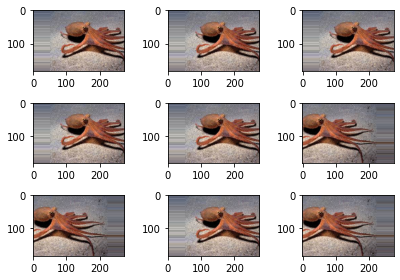

In [4]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample
samples = expand_dims(data, 0)
# We create the data augmenter using only makeover
datagen = ImageDataGenerator(width_shift_range=[-50,50])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	   # batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') # is converted to a valid value so that it can be displayed as an image plt.imshow (image)
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively. 
Magnification is specified by a **horizontal_flip** or **vertical_flip** Boolean argument for the **ImageDataGenerator** class.

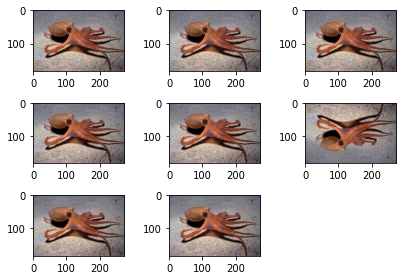

In [6]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(1,9):
	plt.subplot(330 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range].

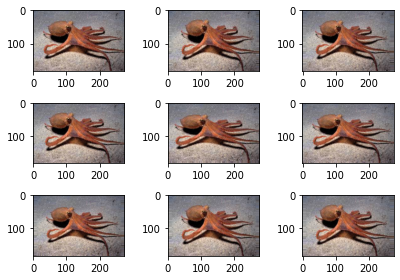

In [7]:
datagen = ImageDataGenerator(zoom_range=0.1) #float or Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

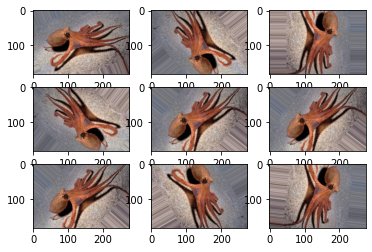

In [8]:
datagen = ImageDataGenerator(rotation_range=360)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center**:  Boolean, to set the mean of each sample to zero
              featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on the characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boolean, indicates if ZCA bleaching is applied.      

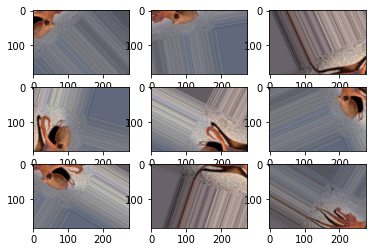

In [9]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.

There are some libraries that we can help to carry out this task, we will begin by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. But we will only focus on data augmentation.

In [10]:
!pip install textattack

     |████████████████████████████████| 327kB 5.0MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 1.7MB 13.7MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 1.1MB 26.1MB/s 
     |████████████████████████████████| 102kB 14.9MB/s 
     |████████████████████████████████| 778kB 55.6MB/s 
     |████████████████████████████████| 686kB 49.9MB/s 
     |████████████████████████████████| 3.0MB 49.5MB/s 
     |████████████████████████████████| 235kB 55.2MB/s 
     |████████████████████████████████| 317kB 63.3MB/s 
     |████████████████████████████████| 245kB 52.2MB/s 
     |████████████████████████████████| 153kB 47.5MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 102kB 15.5MB/s 
     |████████████████████████████████| 122kB 51.9MB/s 
     |████████████████████████████████| 163kB 60.3MB/s 
     |████████████████████████████████| 890kB 54.7MB/

In [11]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 01:11:45 INFO: Downloading default packages for language: en (English)...
2020-10-16 01:13:47 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [12]:
text = "What everyone does in a day, I do it in 24 hours"

TextAttack provides us four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.




In [13]:
aug = WordNetAugmenter();
aug.augment(text)

['What everyone does in a day, single do it in 24 hours']


## EmbeddingAugmenter
Aguments the text transforming words with its scale, with a restriction to guarantee that its cosine similarity is at least of 0,8.


In [14]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:14<00:00, 32.7MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpadvhyzjy.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Quel everyone does in a day, I do it in 24 hours']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [15]:
aug = CharSwapAugmenter()
aug.augment(text)

['What everyone does in a zay, I do it in 24 hours']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [16]:
aug = EasyDataAugmenter()
aug.augment(text)

['What everyone does in a day, I do it in 24 hours A',
 'What everyone does in a day, I do it in hours',
 'What everyone it in a day, I do does in 24 hours',
 'What everyone does in a Day, I do it in 24 hours']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:



1. **src**: source language. this parameter is optional as **googletrans** will detect it.
2.   **dest**: target language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.

Some examples of languages:


*   Afrikáans	'af'

*   Chino (simplified) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [17]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 972kB 14.7MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=13b6ebde5a5b55a374a0faff31d8fc2e09270e4d27149566858795cfc7237dc3
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=b68d1e3e93e7344a25808351e1e61d16262edd96085b6315678ef2d00d741207
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [18]:
from googletrans import Translator
translator = Translator()

In [19]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Si al principio no tiene éxito, intente, vuelva a intentarlo.
If you are not successful at first, please try, try again.
